In [1]:
names=["espalda0","bicep0","triceps0","pecho0"]
classes=[0,1,2,3]

name_classes=["espalda","bicep","triceps","pecho"]
incT=50

winIndSize=list(range(-39,1,1))

print(winIndSize, "#", len(winIndSize))


[-39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0] # 40


In [2]:
import numpy as np
from pandas import read_csv    

import time

from datetime import datetime
from numpy import mean



X=[]
Y=[]
Z=[]
L=[]
TT=[]
C=[]




incT0=0
N=0
for iname,name in enumerate(names):
    
    
    series=read_csv(name+".tsv", sep="\t",parse_dates=False)
    Ylabel=read_csv(name+".L.tsv", sep="\t",parse_dates=False)

    print(series.values)
            
    TY=np.array(Ylabel["timestamp"])
    LY=np.array(Ylabel["label"])

    print("TL0:",TY)
    print("LY0:",LY)


    lastT=-1
    for i in range(0,len(TY)):
        if(LY[i]==0 or LY[i]==-1):
            TY[i]=TY[i]+lastT
            lastT=TY[i]
        if(LY[i]==1):
            lastT=TY[i]
        if(LY[i]==-1):
            lastT=-1

    print("TL:",TY)
    print("LY:",LY)

    T=np.array(series["timestamp"])

    t0=T[0]
    tY0=TY[0]
    tN=T[-1]
    print(t0,tN)

    tY0=int(tY0/incT)*incT
    t0=int(t0/incT)*incT
    tN=int(tN/incT)*incT

    print("TIMES:",t0,tN, (int)(tN-t0)/1000)


    v0=0
    sesion=False
    for ti in range(t0,tN,incT):
        print("ti:",ti, ti-t0)

        i=np.where( (TY>=ti-t0) & (TY<=ti+incT-t0))
        print("i2:",i[0], "LY:",LY[i[0]])

        if(len(i[0])>0):
            l=LY[i[0][0]]
            if(l==1):
                v0=0
                sesion=True
            if(l==-1):
                v0=0
                sesion=False    
            if(l==0):
                v0=0


        if(sesion):
            v0=v0+0.01
            print("v0:",v0)
            L.append(v0)
        else:
            L.append(-1)


        i=np.where( (T>=ti) & (T<=ti+incT))
        print(i)
        print(series.values[i])

        x0=mean(series.values[i][:,0])
        y0=mean(series.values[i][:,1])
        z0=mean(series.values[i][:,2])
        
        print("x0",x0,"y0",y0,"z0",z0)
        #print("X",X,"Y",Y,"Z",Z)

        if(sesion):
            X.append(x0)
            Z.append(z0)
            Y.append(y0)         
        else:
            X.append(x0)
            Z.append(z0)     
            Y.append(y0)         
        #print(x0,y0,z0)    



        TT.append(ti-t0+incT0)
        C.append(classes[iname])
        N=N+1
    incT0=incT0+ti-t0

[[ 7.00000000e-01  3.90000000e+00  7.50000000e+00  1.68840200e+12]
 [ 1.20000000e+00  5.50000000e+00  7.70000000e+00  1.68840200e+12]
 [ 1.80000000e+00  5.50000000e+00  8.20000000e+00  1.68840200e+12]
 ...
 [-6.00000000e-01 -3.40000000e+00  8.70000000e+00  1.68840219e+12]
 [-7.00000000e-01 -3.10000000e+00  9.20000000e+00  1.68840219e+12]
 [-1.40000000e+00 -1.30000000e+00  1.00000000e+01  1.68840219e+12]]
TL0: [ 29500   2500   2500   2000   2000   2500   2000   2000   2000   2500
   2500    500  67000   3000   2500   2000   2000   2500   2000   2000
   2000   2500   2000    500 107000   3000   2500   2000   2000   2500
   2000   2000   2000   2500   2000    500 151500   3000   2500   2000
   2000   2500   2000   2000   2500   2000   2000    500]
LY0: [ 1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0 -1
  1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0 -1]
TL: [ 29500  32000  34500  36500  38500  41000  43000  45000  47000  49500
  52000  52500  67

x0 9.4 y0 -2.8 z0 -1.4
ti: 1688402033900 29850
i2: [] LY: []
v0: 0.08
(array([1492, 1493, 1494], dtype=int64),)
[[ 9.20000000e+00 -2.20000000e+00 -1.30000000e+00  1.68840203e+12]
 [ 8.90000000e+00 -2.30000000e+00 -1.80000000e+00  1.68840203e+12]
 [ 8.90000000e+00 -2.80000000e+00 -1.20000000e+00  1.68840203e+12]]
x0 9.0 y0 -2.433333333333333 z0 -1.4333333333333333
ti: 1688402033950 29900
i2: [] LY: []
v0: 0.09
(array([1495, 1496], dtype=int64),)
[[ 8.60000000e+00 -2.40000000e+00 -9.00000000e-01  1.68840203e+12]
 [ 8.40000000e+00 -2.30000000e+00 -1.30000000e+00  1.68840203e+12]]
x0 8.5 y0 -2.3499999999999996 z0 -1.1
ti: 1688402034000 29950
i2: [] LY: []
v0: 0.09999999999999999
(array([1497, 1498, 1499], dtype=int64),)
[[ 8.80000000e+00 -2.60000000e+00 -1.40000000e+00  1.68840203e+12]
 [ 8.90000000e+00 -2.50000000e+00 -1.40000000e+00  1.68840203e+12]
 [ 8.90000000e+00 -2.10000000e+00 -1.40000000e+00  1.68840203e+12]]
x0 8.866666666666667 y0 -2.4 z0 -1.3999999999999997
ti: 1688402034050 30

x0 11.366666666666667 y0 0.03333333333333329 z0 2.5333333333333337
ti: 1688402063050 59000
i2: [] LY: []
(array([2950, 2951], dtype=int64),)
[[1.04000000e+01 1.00000000e+00 2.80000000e+00 1.68840206e+12]
 [1.10000000e+01 1.20000000e+00 3.00000000e+00 1.68840206e+12]]
x0 10.7 y0 1.1 z0 2.9
ti: 1688402063100 59050
i2: [] LY: []
(array([2952, 2953, 2954], dtype=int64),)
[[ 1.07000000e+01  9.00000000e-01  3.00000000e+00  1.68840206e+12]
 [ 1.00000000e+01  1.00000000e-01  2.60000000e+00  1.68840206e+12]
 [ 9.80000000e+00 -4.00000000e-01  2.40000000e+00  1.68840206e+12]]
x0 10.166666666666666 y0 0.19999999999999998 z0 2.6666666666666665
ti: 1688402063150 59100
i2: [] LY: []
(array([2955, 2956], dtype=int64),)
[[9.80000000e+00 0.00000000e+00 2.30000000e+00 1.68840206e+12]
 [9.60000000e+00 5.00000000e-01 1.50000000e+00 1.68840206e+12]]
x0 9.7 y0 0.25 z0 1.9
ti: 1688402063200 59150
i2: [] LY: []
(array([2957, 2958, 2959], dtype=int64),)
[[ 9.30000000e+00 -6.00000000e-01  1.50000000e+00  1.68840

x0 9.7 y0 -5.199999999999999 z0 -1.35
ti: 1688402091900 87850
i2: [] LY: []
v0: 0.08
(array([4392, 4393, 4394], dtype=int64),)
[[ 9.30000000e+00 -5.40000000e+00 -8.00000000e-01  1.68840209e+12]
 [ 1.03000000e+01 -6.00000000e+00 -1.50000000e+00  1.68840209e+12]
 [ 9.60000000e+00 -4.40000000e+00 -5.00000000e-01  1.68840209e+12]]
x0 9.733333333333334 y0 -5.266666666666667 z0 -0.9333333333333332
ti: 1688402091950 87900
i2: [] LY: []
v0: 0.09
(array([4395, 4396], dtype=int64),)
[[ 8.80000000e+00 -4.40000000e+00  4.00000000e-01  1.68840209e+12]
 [ 9.30000000e+00 -4.60000000e+00  4.00000000e-01  1.68840209e+12]]
x0 9.05 y0 -4.5 z0 0.4
ti: 1688402092000 87950
i2: [] LY: []
v0: 0.09999999999999999
(array([4397, 4398, 4399], dtype=int64),)
[[ 9.30000000e+00 -4.70000000e+00  2.00000000e-01  1.68840209e+12]
 [ 9.50000000e+00 -4.40000000e+00  2.00000000e-01  1.68840209e+12]
 [ 1.01000000e+01 -4.50000000e+00 -2.00000000e-01  1.68840209e+12]]
x0 9.633333333333333 y0 -4.533333333333334 z0 0.0666666666

x0 10.95 y0 -6.2 z0 -1.5
ti: 1688402122300 118250
i2: [] LY: []
v0: 0.36000000000000015
(array([5912, 5913, 5914], dtype=int64),)
[[ 9.70000000e+00 -6.60000000e+00 -1.40000000e+00  1.68840212e+12]
 [ 9.30000000e+00 -6.10000000e+00 -2.10000000e+00  1.68840212e+12]
 [ 8.30000000e+00 -5.90000000e+00 -1.70000000e+00  1.68840212e+12]]
x0 9.1 y0 -6.2 z0 -1.7333333333333334
ti: 1688402122350 118300
i2: [] LY: []
v0: 0.37000000000000016
(array([5915, 5916], dtype=int64),)
[[ 7.60000000e+00 -6.80000000e+00 -1.50000000e+00  1.68840212e+12]
 [ 7.30000000e+00 -6.50000000e+00 -2.40000000e+00  1.68840212e+12]]
x0 7.449999999999999 y0 -6.65 z0 -1.95
ti: 1688402122400 118350
i2: [] LY: []
v0: 0.38000000000000017
(array([5917, 5918, 5919], dtype=int64),)
[[ 7.10000000e+00 -6.50000000e+00 -2.00000000e+00  1.68840212e+12]
 [ 6.60000000e+00 -6.60000000e+00 -2.10000000e+00  1.68840212e+12]
 [ 6.60000000e+00 -6.80000000e+00 -2.50000000e+00  1.68840212e+12]]
x0 6.766666666666666 y0 -6.633333333333333 z0 -2.1

[[ 9.50000000e+00 -1.60000000e+00  9.00000000e-01  1.68840215e+12]
 [ 9.60000000e+00 -1.70000000e+00  8.00000000e-01  1.68840215e+12]
 [ 9.70000000e+00 -1.70000000e+00  1.00000000e+00  1.68840215e+12]]
x0 9.6 y0 -1.6666666666666667 z0 0.9
ti: 1688402152650 148600
i2: [] LY: []
(array([7430, 7431], dtype=int64),)
[[ 9.50000000e+00 -1.60000000e+00  1.10000000e+00  1.68840215e+12]
 [ 9.40000000e+00 -1.70000000e+00  1.20000000e+00  1.68840215e+12]]
x0 9.45 y0 -1.65 z0 1.15
ti: 1688402152700 148650
i2: [] LY: []
(array([7432, 7433, 7434], dtype=int64),)
[[ 9.30000000e+00 -1.80000000e+00  1.10000000e+00  1.68840215e+12]
 [ 9.60000000e+00 -1.50000000e+00  1.10000000e+00  1.68840215e+12]
 [ 9.50000000e+00 -1.60000000e+00  9.00000000e-01  1.68840215e+12]]
x0 9.466666666666667 y0 -1.6333333333333335 z0 1.0333333333333334
ti: 1688402152750 148700
i2: [] LY: []
(array([7435, 7436], dtype=int64),)
[[ 9.60000000e+00 -1.70000000e+00  8.00000000e-01  1.68840215e+12]
 [ 9.70000000e+00 -1.70000000e+00  

x0 2.1666666666666665 y0 -7.3 z0 1.7333333333333334
ti: 1688402183250 179200
i2: [] LY: []
(array([8960, 8961], dtype=int64),)
[[ 7.00000000e-01 -6.80000000e+00  3.60000000e+00  1.68840218e+12]
 [ 3.00000000e-01 -6.80000000e+00  3.60000000e+00  1.68840218e+12]]
x0 0.5 y0 -6.8 z0 3.6
ti: 1688402183300 179250
i2: [] LY: []
(array([8962, 8963, 8964], dtype=int64),)
[[ 2.00000000e-01 -5.60000000e+00  2.90000000e+00  1.68840218e+12]
 [-3.00000000e-01 -5.80000000e+00  2.30000000e+00  1.68840218e+12]
 [-4.00000000e-01 -5.10000000e+00  3.30000000e+00  1.68840218e+12]]
x0 -0.16666666666666666 y0 -5.5 z0 2.8333333333333335
ti: 1688402183350 179300
i2: [] LY: []
(array([8965, 8966], dtype=int64),)
[[-5.00000000e-01 -5.00000000e+00  4.10000000e+00  1.68840218e+12]
 [-1.40000000e+00 -4.90000000e+00  4.50000000e+00  1.68840218e+12]]
x0 -0.95 y0 -4.95 z0 4.3
ti: 1688402183400 179350
i2: [] LY: []
(array([8967, 8968, 8969], dtype=int64),)
[[-1.90000000e+00 -5.10000000e+00  4.60000000e+00  1.68840218e+

x0 -8.466666666666667 y0 -0.3 z0 1.2
ti: 1687877703550 22350
i2: [] LY: []
v0: 0.48000000000000026
(array([1117, 1118], dtype=int64),)
[[-9.3000000e+00  9.0000000e-01  2.3000000e+00  1.6878777e+12]
 [-1.0200000e+01 -3.0000000e-01  3.5000000e+00  1.6878777e+12]]
x0 -9.75 y0 0.30000000000000004 z0 2.9
ti: 1687877703600 22400
i2: [] LY: []
v0: 0.49000000000000027
(array([1119, 1120, 1121], dtype=int64),)
[[-1.1000000e+01 -8.0000000e-01  3.3000000e+00  1.6878777e+12]
 [-1.0100000e+01  5.0000000e-01  5.1000000e+00  1.6878777e+12]
 [-1.0100000e+01 -2.0000000e-01  4.5000000e+00  1.6878777e+12]]
x0 -10.4 y0 -0.16666666666666666 z0 4.3
ti: 1687877703650 22450
i2: [1] LY: [0]
v0: 0.01
(array([1122, 1123], dtype=int64),)
[[-9.9000000e+00 -5.0000000e-01  4.3000000e+00  1.6878777e+12]
 [-9.5000000e+00 -2.0000000e-01  4.5000000e+00  1.6878777e+12]]
x0 -9.7 y0 -0.35 z0 4.4
ti: 1687877703700 22500
i2: [1] LY: [0]
v0: 0.01
(array([1124, 1125, 1126], dtype=int64),)
[[-8.9000000e+00  3.0000000e-01  3.400

x0 8.8 y0 -6.35 z0 2.8
ti: 1687877732300 51100
i2: [] LY: []
(array([2554, 2555, 2556], dtype=int64),)
[[ 8.20000000e+00 -7.20000000e+00  3.30000000e+00  1.68787773e+12]
 [ 8.30000000e+00 -4.10000000e+00  1.50000000e+00  1.68787773e+12]
 [ 9.50000000e+00 -1.70000000e+00 -5.00000000e-01  1.68787773e+12]]
x0 8.666666666666666 y0 -4.333333333333333 z0 1.4333333333333333
ti: 1687877732350 51150
i2: [] LY: []
(array([2557, 2558], dtype=int64),)
[[ 1.02000000e+01 -2.20000000e+00 -4.00000000e-01  1.68787773e+12]
 [ 1.01000000e+01 -1.00000000e+00  9.00000000e-01  1.68787773e+12]]
x0 10.149999999999999 y0 -1.6 z0 0.25
ti: 1687877732400 51200
i2: [] LY: []
(array([2559, 2560, 2561], dtype=int64),)
[[ 1.24000000e+01  4.00000000e-01  2.00000000e-01  1.68787773e+12]
 [ 1.25000000e+01 -4.00000000e-01 -1.50000000e+00  1.68787773e+12]
 [ 1.24000000e+01  1.40000000e+00 -9.00000000e-01  1.68787773e+12]]
x0 12.433333333333332 y0 0.4666666666666666 z0 -0.7333333333333334
ti: 1687877732450 51250
i2: [] LY:

x0 8.100000000000001 y0 -5.05 z0 -7.0
ti: 1687877760300 79100
i2: [] LY: []
v0: 0.23000000000000007
(array([3954, 3955, 3956], dtype=int64),)
[[ 8.60000000e+00 -4.90000000e+00 -8.50000000e+00  1.68787776e+12]
 [ 8.50000000e+00 -4.50000000e+00 -8.10000000e+00  1.68787776e+12]
 [ 8.00000000e+00 -4.60000000e+00 -6.70000000e+00  1.68787776e+12]]
x0 8.366666666666667 y0 -4.666666666666667 z0 -7.766666666666667
ti: 1687877760350 79150
i2: [] LY: []
v0: 0.24000000000000007
(array([3957, 3958], dtype=int64),)
[[ 8.00000000e+00 -4.50000000e+00 -6.40000000e+00  1.68787776e+12]
 [ 8.50000000e+00 -4.70000000e+00 -7.40000000e+00  1.68787776e+12]]
x0 8.25 y0 -4.6 z0 -6.9
ti: 1687877760400 79200
i2: [] LY: []
v0: 0.25000000000000006
(array([3959, 3960, 3961], dtype=int64),)
[[ 8.40000000e+00 -3.80000000e+00 -7.30000000e+00  1.68787776e+12]
 [ 8.00000000e+00 -3.80000000e+00 -5.90000000e+00  1.68787776e+12]
 [ 7.50000000e+00 -4.00000000e+00 -6.00000000e+00  1.68787776e+12]]
x0 7.966666666666666 y0 -3.8

x0 6.7 y0 -7.066666666666666 z0 -0.8666666666666667
ti: 1687877789850 108650
i2: [] LY: []
(array([5432, 5433], dtype=int64),)
[[ 6.10000000e+00 -7.30000000e+00 -1.20000000e+00  1.68787779e+12]
 [ 6.60000000e+00 -7.80000000e+00 -1.60000000e+00  1.68787779e+12]]
x0 6.35 y0 -7.55 z0 -1.4
ti: 1687877789900 108700
i2: [] LY: []
(array([5434, 5435, 5436], dtype=int64),)
[[ 6.40000000e+00 -7.70000000e+00 -1.90000000e+00  1.68787779e+12]
 [ 6.30000000e+00 -6.20000000e+00 -1.80000000e+00  1.68787779e+12]
 [ 6.50000000e+00 -6.00000000e+00 -3.00000000e+00  1.68787779e+12]]
x0 6.3999999999999995 y0 -6.633333333333333 z0 -2.2333333333333334
ti: 1687877789950 108750
i2: [] LY: []
(array([5437, 5438], dtype=int64),)
[[ 7.50000000e+00 -7.90000000e+00 -3.20000000e+00  1.68787779e+12]
 [ 7.00000000e+00 -8.80000000e+00 -2.60000000e+00  1.68787779e+12]]
x0 7.25 y0 -8.350000000000001 z0 -2.9000000000000004
ti: 1687877790000 108800
i2: [] LY: []
(array([5439, 5440, 5441], dtype=int64),)
[[ 6.90000000e+00 -

x0 10.05 y0 -4.75 z0 -8.4
ti: 1687877819400 138200
i2: [] LY: []
v0: 0.35000000000000014
(array([6909, 6910, 6911], dtype=int64),)
[[ 9.50000000e+00 -5.30000000e+00 -9.70000000e+00  1.68787782e+12]
 [ 9.00000000e+00 -4.70000000e+00 -9.90000000e+00  1.68787782e+12]
 [ 8.50000000e+00 -4.90000000e+00 -1.02000000e+01  1.68787782e+12]]
x0 9.0 y0 -4.966666666666667 z0 -9.933333333333334
ti: 1687877819450 138250
i2: [] LY: []
v0: 0.36000000000000015
(array([6912, 6913], dtype=int64),)
[[ 7.30000000e+00 -4.90000000e+00 -9.90000000e+00  1.68787782e+12]
 [ 6.90000000e+00 -4.60000000e+00 -1.04000000e+01  1.68787782e+12]]
x0 7.1 y0 -4.75 z0 -10.15
ti: 1687877819500 138300
i2: [] LY: []
v0: 0.37000000000000016
(array([6914, 6915, 6916], dtype=int64),)
[[ 6.50000000e+00 -4.40000000e+00 -1.05000000e+01  1.68787782e+12]
 [ 5.10000000e+00 -4.30000000e+00 -1.03000000e+01  1.68787782e+12]
 [ 4.20000000e+00 -3.80000000e+00 -9.90000000e+00  1.68787782e+12]]
x0 5.266666666666667 y0 -4.166666666666667 z0 -10

[[ 6.70000000e+00 -1.70000000e+00 -5.00000000e+00  1.68787785e+12]
 [ 6.50000000e+00 -1.00000000e+00 -5.20000000e+00  1.68787785e+12]
 [ 6.40000000e+00 -1.00000000e+00 -4.70000000e+00  1.68787785e+12]]
x0 6.533333333333334 y0 -1.2333333333333334 z0 -4.966666666666666
ti: 1687877847950 166750
i2: [] LY: []
(array([8337, 8338], dtype=int64),)
[[ 6.10000000e+00 -1.00000000e+00 -4.50000000e+00  1.68787785e+12]
 [ 6.10000000e+00 -7.00000000e-01 -4.40000000e+00  1.68787785e+12]]
x0 6.1 y0 -0.85 z0 -4.45
ti: 1687877848000 166800
i2: [] LY: []
(array([8339, 8340, 8341], dtype=int64),)
[[ 5.90000000e+00 -1.00000000e+00 -4.50000000e+00  1.68787785e+12]
 [ 5.90000000e+00 -1.00000000e+00 -4.30000000e+00  1.68787785e+12]
 [ 6.10000000e+00 -9.00000000e-01 -4.20000000e+00  1.68787785e+12]]
x0 5.966666666666666 y0 -0.9666666666666667 z0 -4.333333333333333
ti: 1687877848050 166850
i2: [] LY: []
(array([8342, 8343], dtype=int64),)
[[ 6.70000000e+00 -5.00000000e-01 -4.90000000e+00  1.68787785e+12]
 [ 6.1

x0 8.866666666666667 y0 -3.733333333333333 z0 -5.3
ti: 1687877873950 192750
i2: [] LY: []
v0: 0.26000000000000006
(array([9637, 9638], dtype=int64),)
[[ 8.80000000e+00 -3.60000000e+00 -6.50000000e+00  1.68787787e+12]
 [ 8.60000000e+00 -3.50000000e+00 -5.80000000e+00  1.68787787e+12]]
x0 8.7 y0 -3.55 z0 -6.15
ti: 1687877874000 192800
i2: [] LY: []
v0: 0.2700000000000001
(array([9639, 9640, 9641], dtype=int64),)
[[ 8.60000000e+00 -3.30000000e+00 -4.60000000e+00  1.68787787e+12]
 [ 8.30000000e+00 -3.20000000e+00 -4.80000000e+00  1.68787787e+12]
 [ 9.30000000e+00 -3.50000000e+00 -6.20000000e+00  1.68787787e+12]]
x0 8.733333333333333 y0 -3.3333333333333335 z0 -5.199999999999999
ti: 1687877874050 192850
i2: [] LY: []
v0: 0.2800000000000001
(array([9642, 9643], dtype=int64),)
[[ 9.00000000e+00 -3.40000000e+00 -5.70000000e+00  1.68787787e+12]
 [ 9.20000000e+00 -3.30000000e+00 -5.00000000e+00  1.68787787e+12]]
x0 9.1 y0 -3.3499999999999996 z0 -5.35
ti: 1687877874100 192900
i2: [] LY: []
v0: 0.2

x0 -7.933333333333334 y0 -5.3 z0 -1.4000000000000001
ti: 1688399199500 7100
i2: [] LY: []
(array([354, 355, 356], dtype=int64),)
[[-7.2000000e+00 -6.6000000e+00 -7.0000000e-01  1.6883992e+12]
 [-7.0000000e+00 -6.4000000e+00 -1.2000000e+00  1.6883992e+12]
 [-6.6000000e+00 -7.7000000e+00 -2.4000000e+00  1.6883992e+12]]
x0 -6.933333333333333 y0 -6.8999999999999995 z0 -1.4333333333333333
ti: 1688399199550 7150
i2: [] LY: []
(array([357, 358, 359], dtype=int64),)
[[-7.0000000e+00 -7.3000000e+00 -2.0000000e+00  1.6883992e+12]
 [-5.7000000e+00 -8.1000000e+00 -1.1000000e+00  1.6883992e+12]
 [-4.8000000e+00 -9.9000000e+00 -1.9000000e+00  1.6883992e+12]]
x0 -5.833333333333333 y0 -8.433333333333332 z0 -1.6666666666666667
ti: 1688399199600 7200
i2: [] LY: []
(array([359, 360, 361], dtype=int64),)
[[-4.8000000e+00 -9.9000000e+00 -1.9000000e+00  1.6883992e+12]
 [-4.0000000e+00 -1.0300000e+01 -2.7000000e+00  1.6883992e+12]
 [-4.5000000e+00 -9.2000000e+00 -2.9000000e+00  1.6883992e+12]]
x0 -4.43333333

x0 -1.4333333333333333 y0 8.6 z0 2.4333333333333336
ti: 1688399228450 36050
i2: [] LY: []
v0: 0.5200000000000002
(array([1802, 1803, 1804], dtype=int64),)
[[-4.70000000e+00  7.10000000e+00  4.00000000e+00  1.68839923e+12]
 [-5.60000000e+00  6.60000000e+00  4.60000000e+00  1.68839923e+12]
 [-5.30000000e+00  7.10000000e+00  4.50000000e+00  1.68839923e+12]]
x0 -5.2 y0 6.933333333333333 z0 4.366666666666666
ti: 1688399228500 36100
i2: [] LY: []
v0: 0.5300000000000002
(array([1804, 1805, 1806], dtype=int64),)
[[-5.30000000e+00  7.10000000e+00  4.50000000e+00  1.68839923e+12]
 [-5.90000000e+00  6.40000000e+00  2.70000000e+00  1.68839923e+12]
 [-6.00000000e+00  6.20000000e+00  3.20000000e+00  1.68839923e+12]]
x0 -5.733333333333333 y0 6.566666666666666 z0 3.466666666666667
ti: 1688399228550 36150
i2: [] LY: []
v0: 0.5400000000000003
(array([1807, 1808, 1809], dtype=int64),)
[[-6.60000000e+00  6.10000000e+00  4.30000000e+00  1.68839923e+12]
 [-3.60000000e+00  8.80000000e+00  3.60000000e+00  1.6

[[1.25000000e+01 2.50000000e+00 2.00000000e+00 1.68839926e+12]
 [1.09000000e+01 2.50000000e+00 1.20000000e+00 1.68839926e+12]
 [9.60000000e+00 2.80000000e+00 6.00000000e-01 1.68839926e+12]]
x0 11.0 y0 2.6 z0 1.2666666666666668
ti: 1688399257250 64850
i2: [] LY: []
(array([3242, 3243, 3244], dtype=int64),)
[[ 8.50000000e+00  1.60000000e+00  3.00000000e-01  1.68839926e+12]
 [ 8.80000000e+00 -1.20000000e+00  8.00000000e-01  1.68839926e+12]
 [ 8.70000000e+00 -3.80000000e+00  8.00000000e-01  1.68839926e+12]]
x0 8.666666666666666 y0 -1.133333333333333 z0 0.6333333333333334
ti: 1688399257300 64900
i2: [] LY: []
(array([3244, 3245, 3246], dtype=int64),)
[[ 8.70000000e+00 -3.80000000e+00  8.00000000e-01  1.68839926e+12]
 [ 1.10000000e+01 -1.60000000e+00  1.10000000e+00  1.68839926e+12]
 [ 7.20000000e+00  6.40000000e+00  5.90000000e+00  1.68839926e+12]]
x0 8.966666666666667 y0 0.3333333333333333 z0 2.6
ti: 1688399257350 64950
i2: [] LY: []
(array([3247, 3248, 3249], dtype=int64),)
[[2.60000000e+

x0 5.5 y0 10.9 z0 -0.20000000000000004
ti: 1688399287200 94800
i2: [] LY: []
v0: 0.6700000000000004
(array([4739, 4740, 4741], dtype=int64),)
[[ 6.50000000e+00  1.14000000e+01 -9.00000000e-01  1.68839929e+12]
 [ 6.20000000e+00  9.90000000e+00 -1.70000000e+00  1.68839929e+12]
 [ 5.10000000e+00  1.08000000e+01  1.00000000e+00  1.68839929e+12]]
x0 5.933333333333333 y0 10.700000000000001 z0 -0.5333333333333333
ti: 1688399287250 94850
i2: [] LY: []
v0: 0.6800000000000004
(array([4742, 4743, 4744], dtype=int64),)
[[4.70000000e+00 1.06000000e+01 9.00000000e-01 1.68839929e+12]
 [5.10000000e+00 1.24000000e+01 5.00000000e-01 1.68839929e+12]
 [4.70000000e+00 1.23000000e+01 2.00000000e-01 1.68839929e+12]]
x0 4.833333333333333 y0 11.766666666666666 z0 0.5333333333333333
ti: 1688399287300 94900
i2: [] LY: []
v0: 0.6900000000000004
(array([4744, 4745, 4746], dtype=int64),)
[[4.70000000e+00 1.23000000e+01 2.00000000e-01 1.68839929e+12]
 [4.60000000e+00 1.20000000e+01 1.10000000e+00 1.68839929e+12]
 [3

[[1.51000000e+01 3.80000000e+00 6.20000000e+00 1.68839931e+12]
 [1.38000000e+01 5.00000000e+00 4.60000000e+00 1.68839931e+12]
 [1.16000000e+01 2.80000000e+00 3.70000000e+00 1.68839931e+12]]
x0 13.5 y0 3.866666666666667 z0 4.833333333333333
ti: 1688399313950 121550
i2: [] LY: []
(array([6077, 6078, 6079], dtype=int64),)
[[ 1.18000000e+01 -1.60000000e+00  3.80000000e+00  1.68839931e+12]
 [ 1.34000000e+01 -5.90000000e+00  2.90000000e+00  1.68839931e+12]
 [ 1.45000000e+01 -4.40000000e+00  2.00000000e+00  1.68839931e+12]]
x0 13.233333333333334 y0 -3.966666666666667 z0 2.9
ti: 1688399314000 121600
i2: [] LY: []
(array([6079, 6080, 6081], dtype=int64),)
[[ 1.45000000e+01 -4.40000000e+00  2.00000000e+00  1.68839931e+12]
 [ 1.44000000e+01 -3.70000000e+00  4.00000000e-01  1.68839931e+12]
 [ 1.46000000e+01 -9.00000000e-01 -3.00000000e-01  1.68839931e+12]]
x0 14.5 y0 -3.0000000000000004 z0 0.7000000000000001
ti: 1688399314050 121650
i2: [] LY: []
(array([6082, 6083, 6084], dtype=int64),)
[[ 1.3900

(array([7544, 7545, 7546], dtype=int64),)
[[ 5.40000000e+00  8.60000000e+00 -2.40000000e+00  1.68839934e+12]
 [ 5.60000000e+00  8.60000000e+00 -2.70000000e+00  1.68839934e+12]
 [ 5.60000000e+00  8.70000000e+00 -2.90000000e+00  1.68839934e+12]]
x0 5.533333333333334 y0 8.633333333333333 z0 -2.6666666666666665
ti: 1688399343350 150950
i2: [] LY: []
v0: 0.5000000000000002
(array([7547, 7548, 7549], dtype=int64),)
[[ 5.50000000e+00  9.50000000e+00 -2.40000000e+00  1.68839934e+12]
 [ 5.50000000e+00  9.70000000e+00 -2.60000000e+00  1.68839934e+12]
 [ 5.30000000e+00  9.90000000e+00 -2.80000000e+00  1.68839934e+12]]
x0 5.433333333333334 y0 9.700000000000001 z0 -2.6
ti: 1688399343400 151000
i2: [] LY: []
v0: 0.5100000000000002
(array([7549, 7550, 7551], dtype=int64),)
[[ 5.30000000e+00  9.90000000e+00 -2.80000000e+00  1.68839934e+12]
 [ 5.40000000e+00  1.10000000e+01 -2.20000000e+00  1.68839934e+12]
 [ 5.40000000e+00  1.18000000e+01 -1.40000000e+00  1.68839934e+12]]
x0 5.366666666666667 y0 10.9 

x0 8.066666666666668 y0 -3.4 z0 1.0
ti: 1688399372900 180500
i2: [] LY: []
(array([9024, 9025, 9026], dtype=int64),)
[[ 8.90000000e+00 -3.50000000e+00  1.70000000e+00  1.68839937e+12]
 [ 9.80000000e+00 -3.00000000e+00  2.30000000e+00  1.68839937e+12]
 [ 1.03000000e+01 -2.20000000e+00  2.70000000e+00  1.68839937e+12]]
x0 9.666666666666668 y0 -2.9 z0 2.2333333333333334
ti: 1688399372950 180550
i2: [] LY: []
(array([9027, 9028, 9029], dtype=int64),)
[[ 9.80000000e+00 -2.90000000e+00  1.40000000e+00  1.68839937e+12]
 [ 1.06000000e+01 -4.00000000e+00  2.00000000e-01  1.68839937e+12]
 [ 1.16000000e+01 -5.00000000e+00 -3.00000000e-01  1.68839937e+12]]
x0 10.666666666666666 y0 -3.966666666666667 z0 0.4333333333333333
ti: 1688399373000 180600
i2: [] LY: []
(array([9029, 9030, 9031], dtype=int64),)
[[ 1.16000000e+01 -5.00000000e+00 -3.00000000e-01  1.68839937e+12]
 [ 1.17000000e+01 -4.80000000e+00  1.10000000e+00  1.68839937e+12]
 [ 1.07000000e+01 -3.60000000e+00  3.00000000e+00  1.68839937e+12]

x0 -7.533333333333334 y0 6.033333333333334 z0 1.6666666666666667
ti: 1688576309700 15800
i2: [] LY: []
(array([789, 790], dtype=int64),)
[[-7.10000000e+00  6.60000000e+00  4.20000000e+00  1.68857631e+12]
 [-6.10000000e+00  5.00000000e+00  4.10000000e+00  1.68857631e+12]]
x0 -6.6 y0 5.8 z0 4.15
ti: 1688576309750 15850
i2: [] LY: []
(array([791, 792, 793], dtype=int64),)
[[-5.60000000e+00  4.00000000e+00  4.10000000e+00  1.68857631e+12]
 [-6.10000000e+00  2.90000000e+00  4.00000000e+00  1.68857631e+12]
 [-6.20000000e+00  1.90000000e+00  5.10000000e+00  1.68857631e+12]]
x0 -5.966666666666666 y0 2.9333333333333336 z0 4.3999999999999995
ti: 1688576309800 15900
i2: [] LY: []
(array([794, 795], dtype=int64),)
[[-7.30000000e+00  1.30000000e+00  7.30000000e+00  1.68857631e+12]
 [-7.80000000e+00  1.90000000e+00  7.20000000e+00  1.68857631e+12]]
x0 -7.55 y0 1.6 z0 7.25
ti: 1688576309850 15950
i2: [] LY: []
(array([796, 797, 798], dtype=int64),)
[[-6.60000000e+00  1.80000000e+00  6.20000000e+00  1

x0 -9.05 y0 2.75 z0 -1.35
ti: 1688576339150 45250
i2: [] LY: []
v0: 0.5600000000000003
(array([2261, 2262, 2263], dtype=int64),)
[[-9.20000000e+00  3.20000000e+00 -1.30000000e+00  1.68857634e+12]
 [-8.90000000e+00  3.30000000e+00 -8.00000000e-01  1.68857634e+12]
 [-8.50000000e+00  3.40000000e+00 -9.00000000e-01  1.68857634e+12]]
x0 -8.866666666666667 y0 3.3000000000000003 z0 -1.0
ti: 1688576339200 45300
i2: [] LY: []
v0: 0.5700000000000003
(array([2264, 2265], dtype=int64),)
[[-8.60000000e+00  4.90000000e+00 -1.20000000e+00  1.68857634e+12]
 [-8.80000000e+00  5.50000000e+00 -1.40000000e+00  1.68857634e+12]]
x0 -8.7 y0 5.2 z0 -1.2999999999999998
ti: 1688576339250 45350
i2: [] LY: []
v0: 0.5800000000000003
(array([2266, 2267, 2268], dtype=int64),)
[[-8.60000000e+00  4.70000000e+00 -2.00000000e+00  1.68857634e+12]
 [-8.10000000e+00  4.80000000e+00 -2.20000000e+00  1.68857634e+12]
 [-8.40000000e+00  5.60000000e+00 -2.60000000e+00  1.68857634e+12]]
x0 -8.366666666666667 y0 5.033333333333333

[[-2.00000000e+00  1.70000000e+00  1.01000000e+01  1.68857637e+12]
 [-3.00000000e+00  8.00000000e-01  1.03000000e+01  1.68857637e+12]]
x0 -2.5 y0 1.25 z0 10.2
ti: 1688576367950 74050
i2: [] LY: []
(array([3701, 3702, 3703], dtype=int64),)
[[-2.90000000e+00 -1.50000000e+00  1.05000000e+01  1.68857637e+12]
 [-2.20000000e+00 -2.40000000e+00  9.30000000e+00  1.68857637e+12]
 [-2.20000000e+00 -2.50000000e+00  9.10000000e+00  1.68857637e+12]]
x0 -2.433333333333333 y0 -2.1333333333333333 z0 9.633333333333333
ti: 1688576368000 74100
i2: [] LY: []
(array([3704, 3705], dtype=int64),)
[[-2.00000000e+00 -3.90000000e+00  9.30000000e+00  1.68857637e+12]
 [-2.00000000e+00 -2.90000000e+00  8.20000000e+00  1.68857637e+12]]
x0 -2.0 y0 -3.4 z0 8.75
ti: 1688576368050 74150
i2: [] LY: []
(array([3706, 3707, 3708], dtype=int64),)
[[-2.30000000e+00 -2.50000000e+00  6.50000000e+00  1.68857637e+12]
 [-8.00000000e-01 -5.60000000e+00  7.30000000e+00  1.68857637e+12]
 [-3.40000000e+00  3.00000000e-01  9.70000000e

(array([5089, 5090], dtype=int64),)
[[-9.3000000e+00 -2.2000000e+00 -1.2000000e+00  1.6885764e+12]
 [-9.4000000e+00 -1.8000000e+00 -1.2000000e+00  1.6885764e+12]]
x0 -9.350000000000001 y0 -2.0 z0 -1.2
ti: 1688576395750 101850
i2: [] LY: []
(array([5091, 5092, 5093], dtype=int64),)
[[-9.3000000e+00 -1.7000000e+00 -1.1000000e+00  1.6885764e+12]
 [-9.3000000e+00 -1.6000000e+00 -1.0000000e+00  1.6885764e+12]
 [-9.3000000e+00 -1.6000000e+00 -1.0000000e+00  1.6885764e+12]]
x0 -9.3 y0 -1.6333333333333335 z0 -1.0333333333333334
ti: 1688576395800 101900
i2: [] LY: []
(array([5094, 5095], dtype=int64),)
[[-9.4000000e+00 -1.9000000e+00 -1.0000000e+00  1.6885764e+12]
 [-9.4000000e+00 -1.9000000e+00 -1.1000000e+00  1.6885764e+12]]
x0 -9.4 y0 -1.9 z0 -1.05
ti: 1688576395850 101950
i2: [13] LY: [1]
v0: 0.01
(array([5096, 5097, 5098], dtype=int64),)
[[-9.5000000e+00 -1.8000000e+00 -1.1000000e+00  1.6885764e+12]
 [-9.4000000e+00 -1.6000000e+00 -1.0000000e+00  1.6885764e+12]
 [-9.3000000e+00 -1.7000000e

(array([6534, 6535], dtype=int64),)
[[-9.00000000e+00 -2.00000000e+00 -5.00000000e-01  1.68857642e+12]
 [-8.90000000e+00 -1.60000000e+00 -7.00000000e-01  1.68857642e+12]]
x0 -8.95 y0 -1.8 z0 -0.6
ti: 1688576424650 130750
i2: [] LY: []
v0: 0.5600000000000003
(array([6536, 6537, 6538], dtype=int64),)
[[-8.50000000e+00 -1.30000000e+00 -1.20000000e+00  1.68857642e+12]
 [-8.50000000e+00 -1.00000000e+00 -1.30000000e+00  1.68857642e+12]
 [-1.15000000e+01 -5.00000000e-01 -2.30000000e+00  1.68857642e+12]]
x0 -9.5 y0 -0.9333333333333332 z0 -1.5999999999999999
ti: 1688576424700 130800
i2: [] LY: []
v0: 0.5700000000000003
(array([6539, 6540], dtype=int64),)
[[-3.92000000e+01 -2.80000000e+00 -2.80000000e+00  1.68857642e+12]
 [ 4.80000000e+00 -3.90000000e+00 -4.30000000e+00  1.68857642e+12]]
x0 -17.200000000000003 y0 -3.3499999999999996 z0 -3.55
ti: 1688576424750 130850
i2: [] LY: []
v0: 0.5800000000000003
(array([6541, 6542, 6543], dtype=int64),)
[[-9.10000000e+00  7.40000000e+00  2.70000000e+00  1

(array([8004, 8005], dtype=int64),)
[[-7.90000000e+00  3.30000000e+00 -2.60000000e+00  1.68857645e+12]
 [-7.10000000e+00  2.90000000e+00 -3.10000000e+00  1.68857645e+12]]
x0 -7.5 y0 3.0999999999999996 z0 -2.85
ti: 1688576454050 160150
i2: [] LY: []
v0: 0.4400000000000002
(array([8006, 8007, 8008], dtype=int64),)
[[-7.70000000e+00  3.40000000e+00 -3.30000000e+00  1.68857645e+12]
 [-7.60000000e+00  2.60000000e+00 -3.50000000e+00  1.68857645e+12]
 [-7.60000000e+00  2.90000000e+00 -1.40000000e+00  1.68857645e+12]]
x0 -7.633333333333333 y0 2.966666666666667 z0 -2.733333333333333
ti: 1688576454100 160200
i2: [] LY: []
v0: 0.45000000000000023
(array([8009, 8010], dtype=int64),)
[[-7.60000000e+00  2.60000000e+00 -2.70000000e+00  1.68857645e+12]
 [-8.00000000e+00  2.60000000e+00 -2.60000000e+00  1.68857645e+12]]
x0 -7.8 y0 2.6 z0 -2.6500000000000004
ti: 1688576454150 160250
i2: [] LY: []
v0: 0.46000000000000024
(array([8011, 8012, 8013], dtype=int64),)
[[-7.90000000e+00  3.30000000e+00 -2.60000

(array([9369, 9370], dtype=int64),)
[[-9.30000000e+00  6.00000000e-01 -2.60000000e+00  1.68857648e+12]
 [-9.40000000e+00  1.00000000e+00 -2.40000000e+00  1.68857648e+12]]
x0 -9.350000000000001 y0 0.8 z0 -2.5
ti: 1688576481350 187450
i2: [] LY: []
v0: 0.4000000000000002
(array([9371, 9372, 9373], dtype=int64),)
[[-9.20000000e+00  1.50000000e+00 -2.50000000e+00  1.68857648e+12]
 [-9.40000000e+00  1.40000000e+00 -2.40000000e+00  1.68857648e+12]
 [-9.40000000e+00  1.90000000e+00 -2.10000000e+00  1.68857648e+12]]
x0 -9.333333333333334 y0 1.5999999999999999 z0 -2.3333333333333335
ti: 1688576481400 187500
i2: [] LY: []
v0: 0.4100000000000002
(array([9374, 9375], dtype=int64),)
[[-9.00000000e+00  2.50000000e+00 -1.80000000e+00  1.68857648e+12]
 [-9.00000000e+00  2.20000000e+00 -2.00000000e+00  1.68857648e+12]]
x0 -9.0 y0 2.35 z0 -1.9
ti: 1688576481450 187550
i2: [] LY: []
v0: 0.4200000000000002
(array([9376, 9377, 9378], dtype=int64),)
[[-8.80000000e+00  2.70000000e+00 -2.00000000e+00  1.68857

x0 -8.0 y0 4.533333333333332 z0 -1.9000000000000001
ti: 1688576507800 213900
i2: [] LY: []
v0: 0.3900000000000002
(array([10694, 10695], dtype=int64),)
[[-8.70000000e+00  4.40000000e+00 -1.30000000e+00  1.68857651e+12]
 [-8.40000000e+00  5.10000000e+00 -1.50000000e+00  1.68857651e+12]]
x0 -8.55 y0 4.75 z0 -1.4
ti: 1688576507850 213950
i2: [] LY: []
v0: 0.4000000000000002
(array([10696, 10697, 10698], dtype=int64),)
[[-8.50000000e+00  5.80000000e+00 -2.20000000e+00  1.68857651e+12]
 [-9.10000000e+00  5.70000000e+00 -2.60000000e+00  1.68857651e+12]
 [-8.80000000e+00  4.20000000e+00 -2.80000000e+00  1.68857651e+12]]
x0 -8.8 y0 5.233333333333333 z0 -2.5333333333333337
ti: 1688576507900 214000
i2: [] LY: []
v0: 0.4100000000000002
(array([10699, 10700], dtype=int64),)
[[-9.10000000e+00  3.50000000e+00 -2.60000000e+00  1.68857651e+12]
 [-8.80000000e+00  3.40000000e+00 -2.60000000e+00  1.68857651e+12]]
x0 -8.95 y0 3.45 z0 -2.6
ti: 1688576507950 214050
i2: [] LY: []
v0: 0.4200000000000002
(arra

x0 -8.833333333333334 y0 3.9 z0 -2.766666666666667
ti: 1688576534300 240400
i2: [] LY: []
v0: 0.3900000000000002
(array([12019, 12020], dtype=int64),)
[[-8.80000000e+00  3.50000000e+00 -2.50000000e+00  1.68857653e+12]
 [-8.40000000e+00  2.80000000e+00 -2.90000000e+00  1.68857653e+12]]
x0 -8.600000000000001 y0 3.15 z0 -2.7
ti: 1688576534350 240450
i2: [] LY: []
v0: 0.4000000000000002
(array([12021, 12022, 12023], dtype=int64),)
[[-8.60000000e+00  3.10000000e+00 -2.90000000e+00  1.68857653e+12]
 [-8.80000000e+00  3.80000000e+00 -2.70000000e+00  1.68857653e+12]
 [-8.90000000e+00  4.20000000e+00 -2.60000000e+00  1.68857653e+12]]
x0 -8.766666666666666 y0 3.7000000000000006 z0 -2.733333333333333
ti: 1688576534400 240500
i2: [] LY: []
v0: 0.4100000000000002
(array([12024, 12025], dtype=int64),)
[[-8.80000000e+00  3.70000000e+00 -2.80000000e+00  1.68857653e+12]
 [-8.80000000e+00  3.80000000e+00 -2.90000000e+00  1.68857653e+12]]
x0 -8.8 y0 3.75 z0 -2.8499999999999996
ti: 1688576534450 240550
i2

In [3]:
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
L=np.array(L)
TT=np.array(TT)
C=np.array(C)

In [4]:
X = (X-np.min(X))/(np.max(X)-np.min(X))
Y = (Y-np.min(Y))/(np.max(Y)-np.min(Y))
Z = (Z-np.min(Z))/(np.max(Z)-np.min(Z))
    




In [5]:
import matplotlib.pyplot as plt


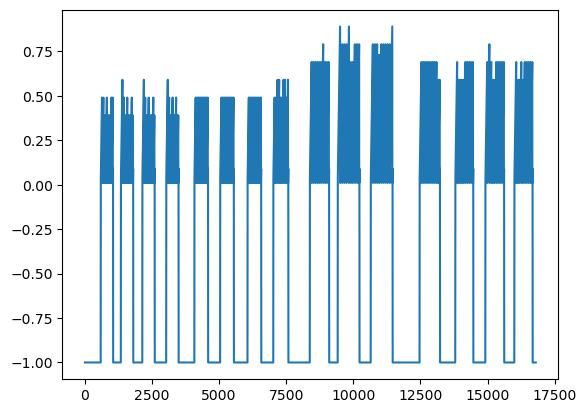

In [6]:
plt.figure()
plt.plot(L)
plt.show()

<AxesSubplot:xlabel='Time'>

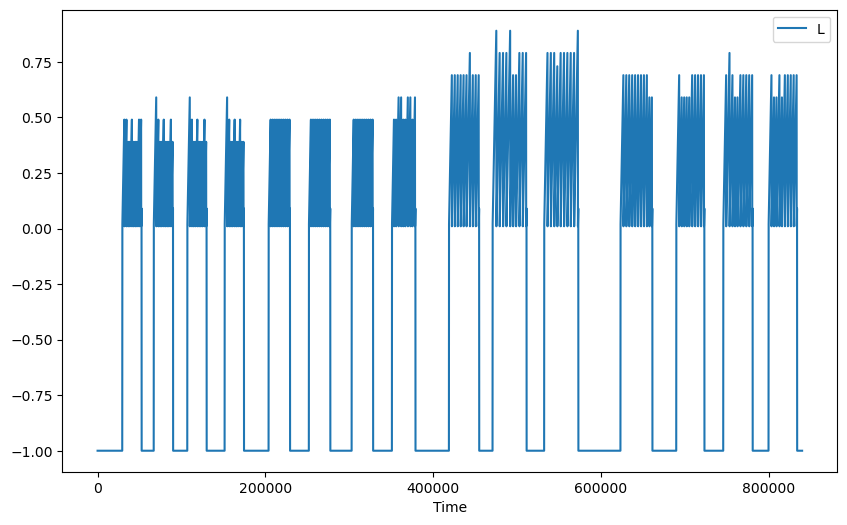

In [7]:
import pandas as pd

df = pd.DataFrame()
df['Time']=TT
df['L']=L


df.plot(x="Time", legend=True, figsize=(10,6))


<AxesSubplot:xlabel='Time'>

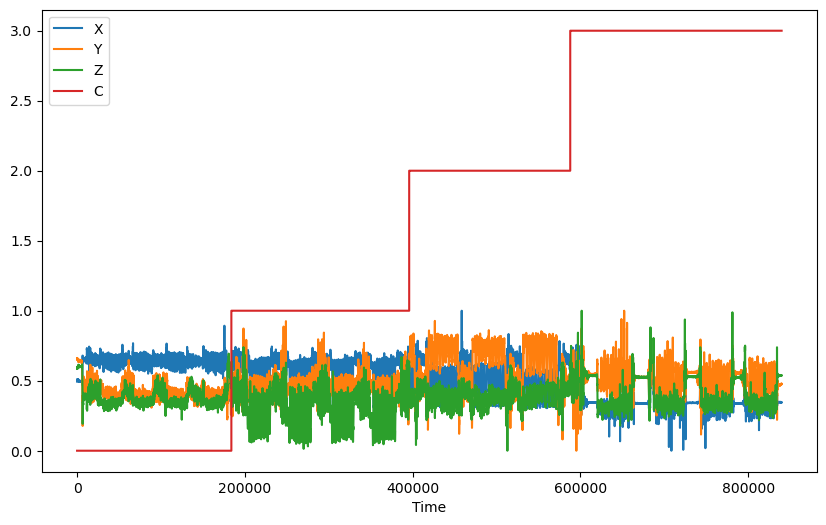

In [8]:
df = pd.DataFrame()
df['Time']=TT
df['X']=X
df['Y']=Y
df['Z']=Z
df['C']=C

df.plot(x="Time", legend=True, figsize=(10,6))

In [9]:
from keras.utils import to_categorical
C0=to_categorical(C)

In [10]:
XYZ=[]
Yclass=[]
for i in range(0,N):
    if(L[i]<0):
        continue
    print("i:",i)
    x1=[]
    y1=[]
    z1=[]
    for it in winIndSize:
        x1.append(X[i+it])
        y1.append(Y[i+it])
        z1.append(Z[i+it])
    xi=[]
    print("x1",x1)
    xi.append(x1)
    xi.append(y1)
    xi.append(z1)
    XYZ.append(np.transpose(xi))
    Yclass.append(C0[i])
XYZ=np.array(XYZ)
Yclass=np.array(Yclass)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




i: 12575
x1 [0.2821135742484057, 0.26146371090191317, 0.288794412389918, 0.3015487397509869, 0.3124810203461889, 0.3097479501973884, 0.26207105982386886, 0.3252353477072578, 0.3070148800485879, 0.3115699969632554, 0.30762222897054353, 0.3061038566656544, 0.30944427573641053, 0.3070148800485879, 0.30944427573641053, 0.31065897358032196, 0.3088369268144549, 0.30792590343152143, 0.31126632250227754, 0.3070148800485879, 0.3070148800485879, 0.28606134224111757, 0.24627998785302158, 0.22775584573337382, 0.2790768296386274, 0.30974795019738843, 0.3228059520194352, 0.3024597631339204, 0.31248102034618896, 0.3252353477072578, 0.3428484664439721, 0.36896447008806554, 0.3568174916489523, 0.3543880959611297, 0.3385970239902824, 0.3379896750683268, 0.3343455815365928, 0.3398117218341937, 0.3246279987853022, 0.31976920740965686]
i: 12576
x1 [0.26146371090191317, 0.288794412389918, 0.3015487397509869, 0.3124810203461889, 0.3097479501973884, 0.26207105982386886, 0.3252353477072578, 0.3070148800485879

In [11]:
print(XYZ.shape)
print(Yclass.shape)   

(9084, 40, 3)
(9084, 4)


TRAIN: [   0    2    3 ... 9081 9082 9083] TEST: [   1   11   15   18   31   39   41   46   66   80   82   86   92   95
   98   99  108  116  125  130  142  149  152  183  185  236  262  274
  300  309  313  322  326  333  346  350  352  365  369  382  393  436
  438  445  449  457  461  468  469  486  495  509  511  528  536  552
  564  565  590  593  597  601  602  603  610  649  652  654  656  657
  663  675  679  703  731  746  756  765  768  773  788  799  811  813
  816  835  848  855  862  875  891  899  903  924  930  931  941  942
  959  964  974  976  992 1005 1008 1010 1020 1025 1043 1045 1099 1114
 1128 1146 1162 1168 1173 1174 1178 1186 1193 1220 1229 1240 1246 1253
 1256 1275 1276 1280 1281 1301 1306 1315 1316 1320 1334 1348 1350 1351
 1362 1366 1377 1389 1393 1396 1400 1405 1414 1424 1435 1437 1442 1449
 1453 1459 1460 1501 1535 1537 1543 1560 1566 1577 1580 1585 1586 1588
 1592 1599 1606 1607 1632 1659 1690 1698 1712 1740 1756 1760 1762 1777
 1792 1800 1808 1812 1818 18

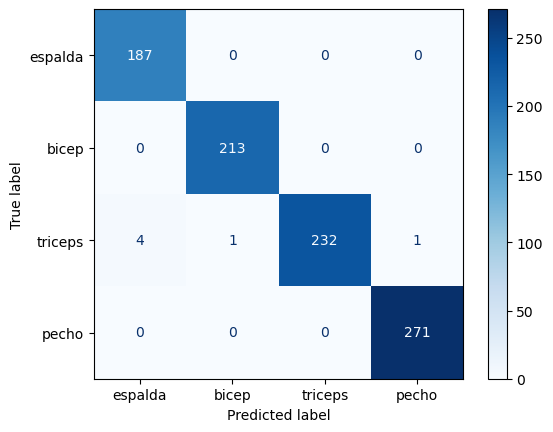

TRAIN: [   1    2    3 ... 9081 9082 9083] TEST: [   0    5    8   16   17   22   28   45   54   85   88   96   97  118
  129  140  156  169  180  190  193  194  206  209  211  240  246  247
  248  252  264  272  279  282  288  296  298  320  325  372  405  416
  417  429  435  447  458  478  483  487  499  501  522  535  570  572
  577  578  580  608  609  619  624  641  644  651  665  668  690  697
  699  721  730  753  772  782  783  789  808  818  830  865  866  868
  873  877  883  889  909  912  917  923  948  949  954  972  973  975
  978  979  990 1048 1058 1061 1063 1065 1070 1071 1086 1098 1112 1122
 1131 1132 1139 1141 1147 1155 1185 1210 1230 1250 1254 1261 1264 1278
 1283 1300 1307 1342 1353 1357 1358 1375 1381 1387 1388 1423 1426 1430
 1431 1433 1450 1457 1463 1484 1485 1491 1494 1495 1503 1516 1523 1524
 1528 1533 1556 1562 1571 1576 1590 1593 1598 1602 1604 1623 1629 1642
 1655 1660 1665 1687 1704 1705 1706 1730 1733 1748 1749 1769 1772 1774
 1785 1790 1791 1793 1795 18

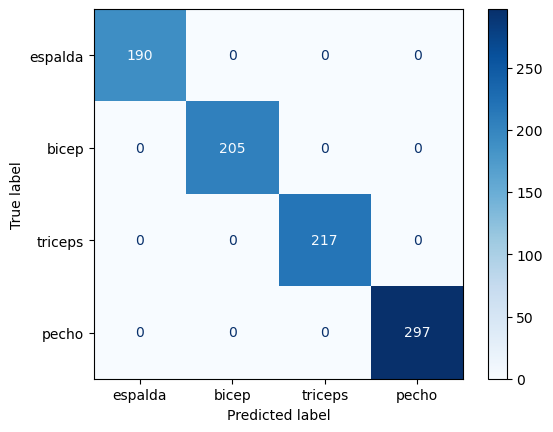

TRAIN: [   0    1    2 ... 9080 9082 9083] TEST: [  19   23   24   30   33   37   52   58   60   68   81   89  103  107
  120  131  141  148  151  159  161  184  207  210  212  213  226  232
  233  239  243  254  258  268  277  281  285  289  292  293  297  307
  319  321  339  341  342  373  387  388  390  399  401  408  409  444
  452  460  462  465  479  482  488  489  497  500  510  514  517  520
  540  550  553  569  574  587  600  606  612  620  635  646  655  664
  671  688  691  698  708  712  714  725  741  745  771  774  784  797
  803  810  823  826  834  843  846  854  863  887  892  898  905  928
  932  935  943  950  956  960  982  986  993  995  998 1007 1009 1017
 1018 1019 1021 1027 1054 1069 1082 1093 1097 1102 1108 1110 1113 1123
 1129 1130 1134 1140 1143 1144 1156 1166 1169 1179 1182 1198 1206 1207
 1214 1216 1226 1237 1239 1245 1252 1271 1313 1319 1330 1333 1364 1365
 1367 1370 1372 1374 1427 1441 1444 1458 1480 1483 1489 1493 1511 1515
 1521 1529 1538 1551 1584 16

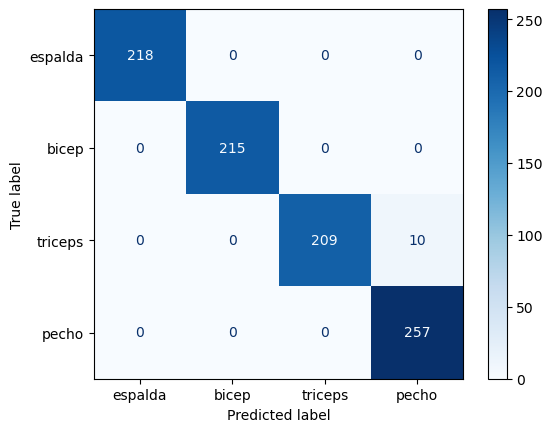

TRAIN: [   0    1    2 ... 9080 9081 9083] TEST: [   4   10   13   25   34   40   55   70   91  101  102  117  123  132
  133  145  147  153  164  170  174  176  179  186  191  198  200  214
  217  242  244  249  257  269  286  301  304  308  316  327  328  351
  376  383  392  439  441  442  454  456  507  532  538  551  556  562
  567  575  586  607  625  633  692  707  709  722  728  742  751  762
  794  820  827  841  847  849  852  856  872  884  894  896  911  947
  962  968  977 1016 1029 1033 1036 1041 1067 1072 1079 1081 1089 1094
 1118 1120 1121 1124 1127 1150 1151 1175 1184 1196 1199 1200 1213 1215
 1231 1235 1243 1247 1260 1267 1273 1277 1279 1282 1295 1303 1312 1323
 1324 1345 1352 1361 1368 1402 1410 1462 1474 1477 1479 1481 1486 1506
 1509 1510 1518 1520 1526 1552 1569 1594 1596 1605 1641 1645 1654 1667
 1675 1696 1713 1717 1721 1745 1787 1803 1828 1844 1863 1875 1876 1877
 1883 1895 1913 1920 1923 1924 1934 1935 1949 1971 1985 2003 2005 2013
 2029 2030 2032 2044 2047 20

[[163   0   0   0]
 [  0 210   0   0]
 [  0   2 247   0]
 [  0   0   0 287]]
Classification Report SCENE 
              precision    recall  f1-score   support

     espalda       1.00      1.00      1.00       163
       bicep       0.99      1.00      1.00       210
     triceps       1.00      0.99      1.00       249
       pecho       1.00      1.00      1.00       287

    accuracy                           1.00       909
   macro avg       1.00      1.00      1.00       909
weighted avg       1.00      1.00      1.00       909



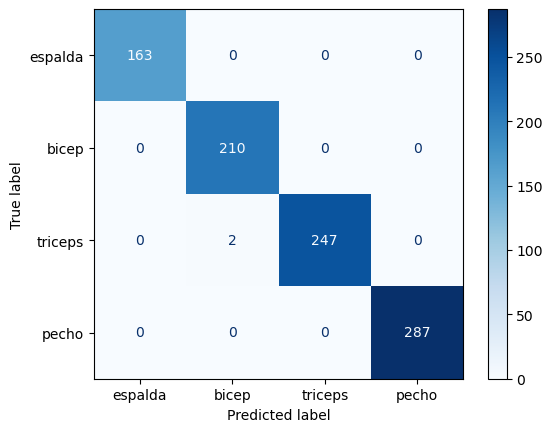

TRAIN: [   0    1    2 ... 9081 9082 9083] TEST: [   7    9   12   32   49   50   71   79   90   93  105  109  119  127
  134  136  155  162  163  197  201  203  204  216  219  224  228  230
  231  253  255  256  260  261  270  276  290  291  311  332  336  353
  377  378  397  406  414  419  423  430  440  464  470  473  476  502
  505  513  523  531  537  542  544  559  560  571  583  585  588  592
  595  604  614  617  618  629  631  639  658  659  677  678  706  716
  717  747  752  755  759  767  775  786  787  791  793  800  804  824
  838  840  861  869  876  880  890  893  904  908  913  915  944  952
  961  983 1004 1022 1052 1055 1077 1084 1087 1090 1116 1137 1148 1170
 1191 1202 1217 1221 1223 1268 1284 1289 1292 1296 1299 1310 1326 1331
 1335 1340 1343 1355 1376 1382 1385 1390 1398 1399 1401 1415 1420 1421
 1438 1445 1448 1464 1476 1487 1512 1517 1519 1536 1542 1546 1553 1572
 1573 1589 1591 1600 1603 1610 1620 1633 1656 1666 1692 1693 1694 1695
 1710 1751 1759 1773 1783 17

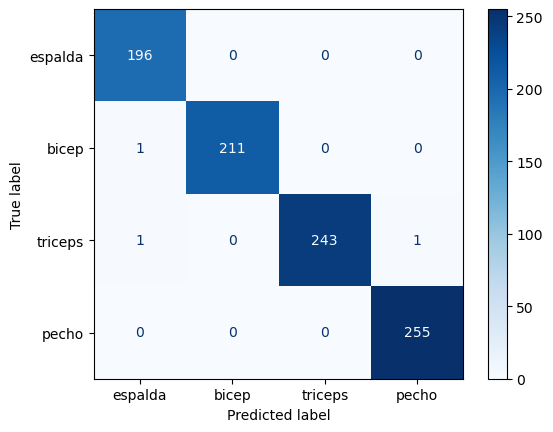

TRAIN: [   0    1    2 ... 9081 9082 9083] TEST: [   3    6   26   27   36   51   61   62   74   78   84  106  154  157
  158  165  167  175  189  192  196  208  215  221  222  227  235  237
  250  275  284  306  310  314  317  324  338  349  355  358  368  374
  375  389  391  422  437  443  459  475  477  480  496  515  530  548
  554  568  582  584  615  640  643  650  669  683  689  694  701  702
  710  715  736  738  743  744  750  757  763  764  779  805  815  825
  839  842  859  864  895  900  907  916  918  920  921  933  934  945
  946  966  971  981  987 1026 1028 1034 1038 1085 1088 1106 1109 1119
 1138 1142 1153 1171 1201 1205 1222 1228 1238 1242 1248 1255 1262 1266
 1288 1294 1297 1305 1332 1336 1337 1344 1394 1407 1411 1422 1425 1428
 1443 1447 1454 1488 1500 1514 1522 1541 1554 1563 1564 1575 1583 1611
 1613 1615 1618 1619 1630 1631 1638 1679 1699 1702 1703 1709 1722 1724
 1732 1734 1739 1752 1768 1780 1810 1824 1829 1848 1852 1866 1871 1872
 1878 1889 1897 1900 1904 19

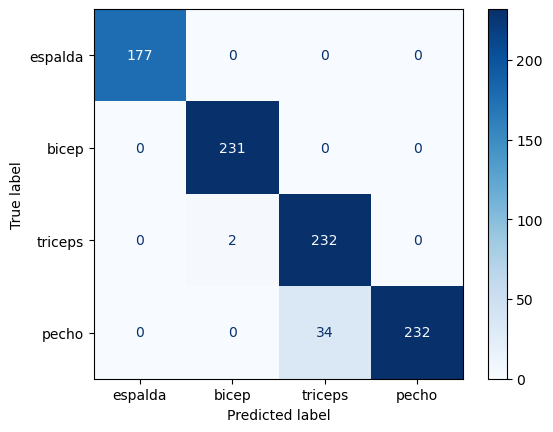

TRAIN: [   0    1    2 ... 9081 9082 9083] TEST: [  29   42   43   73   83   87  104  111  113  115  135  143  168  178
  188  218  220  234  238  241  259  266  280  295  303  312  329  347
  362  363  366  386  394  432  472  490  494  525  526  529  541  547
  558  563  566  594  616  621  637  645  661  667  672  673  680  681
  682  687  696  700  711  720  732  733  734  735  739  776  780  790
  796  798  801  809  817  831  832  853  858  874  878  881  882  886
  902  906  925  929  937  938  939  951  955  958  963  965  969  970
  988  996  999 1011 1012 1014 1015 1037 1039 1042 1059 1060 1076 1095
 1105 1133 1135 1149 1152 1154 1160 1161 1163 1165 1183 1189 1190 1212
 1224 1227 1232 1234 1251 1259 1263 1270 1272 1318 1354 1359 1363 1371
 1383 1384 1391 1412 1416 1432 1465 1466 1470 1471 1502 1504 1513 1540
 1544 1545 1548 1568 1570 1578 1595 1617 1626 1643 1646 1647 1650 1661
 1668 1671 1676 1678 1708 1716 1729 1741 1747 1755 1757 1770 1779 1786
 1801 1806 1817 1832 1839 18

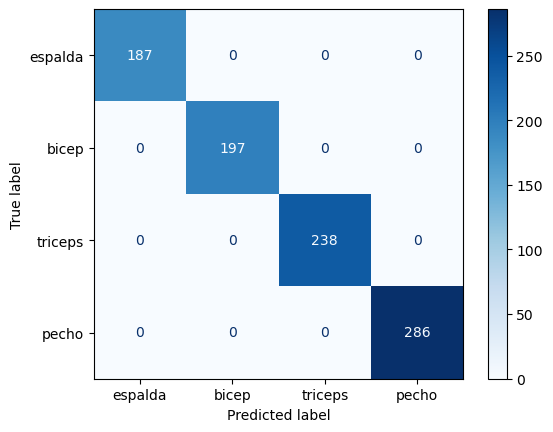

TRAIN: [   0    1    2 ... 9080 9081 9082] TEST: [  14   21   35   48   53   63   75  124  150  160  187  199  202  225
  271  278  283  299  302  335  337  354  357  360  361  364  384  395
  396  403  410  413  418  421  424  426  428  450  463  466  467  474
  484  493  503  508  516  519  521  524  534  545  561  573  576  579
  581  591  628  647  676  684  685  693  695  705  726  740  769  770
  778  781  792  806  807  812  828  844  857  867  888  922  926  927
  936  957  985  991  994  997 1030 1032 1035 1040 1044 1062 1064 1066
 1074 1078 1080 1083 1092 1100 1101 1117 1136 1157 1158 1159 1167 1188
 1194 1197 1209 1236 1241 1286 1287 1291 1293 1298 1311 1317 1347 1356
 1378 1379 1392 1417 1434 1439 1451 1456 1469 1473 1478 1482 1490 1492
 1497 1498 1505 1507 1527 1531 1534 1550 1581 1587 1597 1608 1609 1612
 1636 1639 1651 1652 1657 1677 1686 1731 1754 1766 1781 1788 1821 1827
 1834 1837 1854 1865 1869 1874 1888 1893 1915 1965 1969 1990 1992 2015
 2017 2018 2038 2040 2048 20

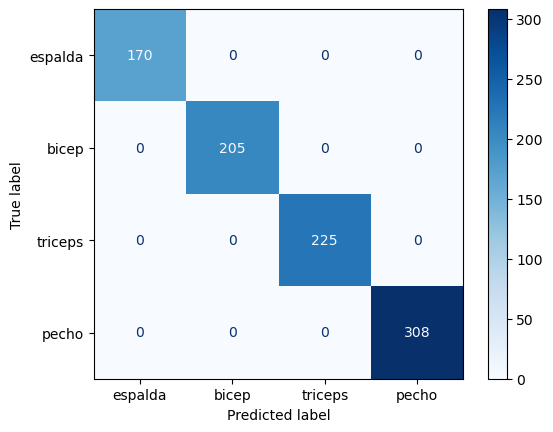

TRAIN: [   0    1    2 ... 9081 9082 9083] TEST: [  47   56   57   64   67   69   76   77   94  110  112  121  122  126
  137  144  166  171  172  177  195  205  223  245  251  265  267  287
  305  315  330  331  340  344  356  370  371  379  380  385  398  400
  402  407  415  427  431  433  434  448  453  455  481  485  491  498
  504  506  512  527  533  539  546  549  555  589  596  598  605  611
  613  623  626  627  630  632  634  636  638  653  670  686  719  727
  729  737  748  749  754  758  761  785  795  814  821  822  833  836
  837  845  851  860  870  885  897  910  914  940  980  984 1001 1006
 1024 1046 1050 1056 1057 1075 1104 1111 1115 1126 1176 1203 1204 1219
 1225 1244 1257 1258 1265 1269 1274 1285 1302 1309 1314 1322 1327 1329
 1338 1341 1349 1360 1373 1380 1386 1395 1403 1404 1409 1413 1418 1419
 1436 1455 1461 1496 1499 1508 1549 1557 1559 1565 1579 1616 1622 1637
 1664 1669 1670 1685 1688 1691 1707 1715 1719 1727 1742 1743 1744 1746
 1758 1763 1778 1794 1798 18

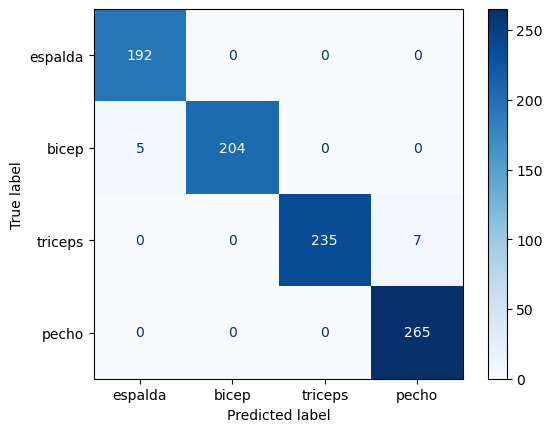

TRAIN: [   0    1    3 ... 9081 9082 9083] TEST: [   2   20   38   44   59   65   72  100  114  128  138  139  146  173
  181  182  229  263  273  294  318  323  334  343  345  348  359  367
  381  404  411  412  420  425  446  451  471  492  518  543  557  599
  622  642  648  660  662  666  674  704  713  718  723  724  760  766
  777  802  819  829  850  871  879  901  919  953  967  989 1000 1002
 1003 1013 1023 1031 1047 1049 1051 1053 1068 1073 1091 1096 1103 1107
 1125 1145 1164 1172 1177 1180 1181 1187 1192 1195 1208 1211 1218 1233
 1249 1290 1304 1308 1321 1325 1328 1339 1346 1369 1397 1406 1408 1429
 1440 1446 1452 1467 1468 1472 1475 1525 1530 1532 1539 1547 1555 1558
 1561 1567 1574 1582 1601 1621 1627 1644 1649 1653 1658 1662 1663 1672
 1673 1683 1684 1689 1697 1700 1718 1720 1723 1725 1726 1735 1753 1761
 1775 1789 1804 1813 1822 1835 1855 1856 1857 1860 1873 1879 1887 1890
 1891 1918 1922 1941 1951 1955 1956 1979 1982 1987 1993 2000 2001 2008
 2011 2012 2050 2051 2056 20

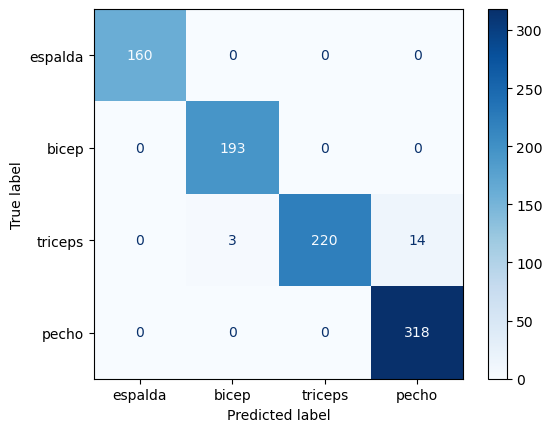

In [12]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from keras.losses import mean_squared_error

from keras import backend as K

from sklearn.model_selection import KFold


#Dividimos los datos en K fold para cross validation
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(XYZ)

Y_pred_total=np.array([])
Y_val_total=np.array([])

for train_index, test_index in kf.split(XYZ):
    #Datos de train y test
    print("TRAIN:", train_index, "TEST:", test_index)
    XYZ_train, XYZ_test = XYZ[train_index], XYZ[test_index]
    Yclass_train, Yclass_test = Yclass[train_index], Yclass[test_index]

    
    model = keras.Sequential()

    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(XYZ.shape[1],XYZ.shape[2])))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

    model.add(Dropout(0.25))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(LSTM(256))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Dense(512))
    model.add(Dense(4, activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])
    model.summary()



    history = model.fit(XYZ_train , Yclass_train,
                    batch_size=64,
            validation_data=(XYZ_test , Yclass_test),
            epochs=5)
    
    

    
    y_pred = model.predict(XYZ_test).argmax(axis=1)
    Yclass_test=Yclass_test.argmax(axis=1)
    print(y_pred)
    print(Yclass_test)

    cm = confusion_matrix(Yclass_test, y_pred) 
    print(cm)
    print('Classification Report SCENE ')
    print(classification_report(Yclass_test, y_pred,target_names=name_classes))



    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=name_classes)

    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    Y_pred_total=np.concatenate((Y_pred_total,y_pred))
    Y_val_total=np.concatenate((Y_val_total,Yclass_test))

[0. 0. 0. ... 3. 3. 3.]
[0. 0. 0. ... 3. 3. 3.]
[[1840    0    0    0]
 [   6 2084    0    0]
 [   5    8 2298   33]
 [   0    0   34 2776]]
Classification Report TOTAL
              precision    recall  f1-score   support

     espalda       0.99      1.00      1.00      1840
       bicep       1.00      1.00      1.00      2090
     triceps       0.99      0.98      0.98      2344
       pecho       0.99      0.99      0.99      2810

    accuracy                           0.99      9084
   macro avg       0.99      0.99      0.99      9084
weighted avg       0.99      0.99      0.99      9084



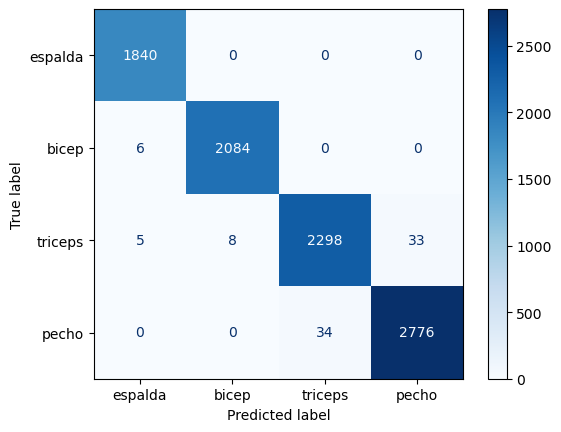

In [13]:
print(Y_pred_total)
print(Y_val_total)

cm = confusion_matrix(Y_val_total, Y_pred_total) 
print(cm)
print('Classification Report TOTAL')
print(classification_report(Y_val_total, Y_pred_total, target_names=name_classes))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=name_classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()